In [1]:
# mostly copied from https://github.com/mirianfsilva/lorenz-attractor-chaos-theory

import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
#from matplotlib import animation

from abstract_defs import *
from transformations import *

In [2]:
rho = 28
sigma = 10
beta = 8/3

rhom1 = rho-1
xp = np.sqrt(beta*rhom1)

#def f_lorenz(t, x_vec):
#    (x, y, z) = x_vec[0:3]
#    x_dot = np.array([sigma * (-x + y),
#                x * (rho - z) - y,
#                x * y - beta * z]) 
#    return x_dot

#px1 = np.array([-sigma, sigma, 0])
#poly_x = Polynomial([0, px1])
#py1 = np.array([rho, -1, 0])
#py2 = np.array([[0, 0, -1],
#                [0, 0, 0],
#                [0, 0, 0]])
#poly_y = Polynomial([0, py1, py2])
#pz1 = np.array([0, 0, -beta])
#pz2 = np.array([[0, 1, 0], 
#                [0, 0, 0], 
#                [0, 0, 0]])
#poly_z = Polynomial([0, pz1, pz2])
#f_lorenz = VectorPolynomial([poly_x, poly_y, poly_z])

order_0 = np.array([0, 0, 0])
order_1 = np.array([[-sigma, sigma, 0],
                    [rho, -1, 0],
                    [0, 0, -beta]])
order_2 = np.zeros([3, 3, 3])
order_2[1, 0, 2] = -1
order_2[2, 0, 1] = 1
f_lorenz = VectorPolynomial([order_0, order_1, order_2])
                      
def fixed_points():
    fp0 = np.array([0, 0, 0])
    fp1 = np.array([xp, xp, rhom1])
    fp2 = np.array([-xp, -xp, rhom1])
    return np.vstack([fp0, fp1, fp2])

fps = fixed_points()

order_1_p1 = np.array([[-sigma, sigma, 0],
                       [1, -1, -xp],
                       [xp, xp, -beta]])
order_1_p2 = np.array([[-sigma, sigma, 0],
                       [1, -1, xp],
                       [-xp, -xp, -beta]])
fp1_lorenz = VectorPolynomial([order_0, order_1_p1, order_2])
fp2_lorenz = VectorPolynomial([order_0, order_1_p2, order_2])

#print(fp1_lorenz)
#print(fp2_lorenz)

D = 4*rho*sigma+(sigma-1)**2
lambdas_p0 = [-beta, 0.5*((-1-sigma)+np.sqrt(D)), 0.5*((-1-sigma)-np.sqrt(D))]
print(lambdas_p0)

[-2.6666666666666665, 11.827723451163457, -22.827723451163457]


In [3]:
(xsize, ysize) = (8.5, 8.5)

# choose a different color for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, 10))
def lorenz_ode_plot_components(t, ys):
    x, y, z = ys[0:3, :]
    plt.figure(figsize=(xsize, ysize))
    plt.plot(t, x, linewidth = 1, color = 'b') 
    plt.plot(t, y, linewidth = 1, color = 'r')
    plt.plot(t, z, linewidth = 1, color = 'g')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('x(t), y(t), z(t)')
    plt.title('Lorenz Time Series Plot')
    
    plt.legend(['x','y','z'], loc = 2)
    #plt.savefig('lorenz_ode_components.png')
    plt.show()
    return 

def lorenz_ode_plot_3d(t, ys, fps):
    x, y, z = ys[0:3, :]
    ax = plt.figure(figsize = (xsize, ysize)).add_subplot(projection='3d')
    ax.plot(x, y, z, linewidth = 0.5, color = 'r')
    ax.plot(fps[:, 0], fps[:, 1], fps[:, 2], 'go')   
    ax.grid(True)
    ax.set_xlabel('x(t)')
    ax.set_ylabel('y(t)')
    ax.set_zlabel('z(t)')
    ax.set_title('Lorenz 3D Plot' )
    
    #plt.savefig('lorenz_ode_3d.png')
    plt.show()
    return

In [4]:
from utils import conjugate_dynamics

base_point = fps[1]
x_prime = translate(shift=base_point, dynamics=fp1_lorenz, debug=False)
#x_prime = translate(shift=fps[0], dynamics=f_lorenz, debug=False)
y = diagonalize(x_prime, debug=False)
z = normal_form(y, debug=False)

In [13]:
max_T = 100
npoints = max_T*100+1
t_eval = np.linspace(0, max_T, npoints)
offset = 1*np.array((1, 1, 0))
x0 = base_point+offset
sol = integrate.solve_ivp(f_lorenz, (0, max_T), x0, method='RK45', t_eval=t_eval, atol=1e-10)

In [14]:
max_T = 1
npoints = max_T*100+1
t_eval = np.linspace(0, max_T, npoints)

ys_pred = conjugate_dynamics(z, t_eval, x0)

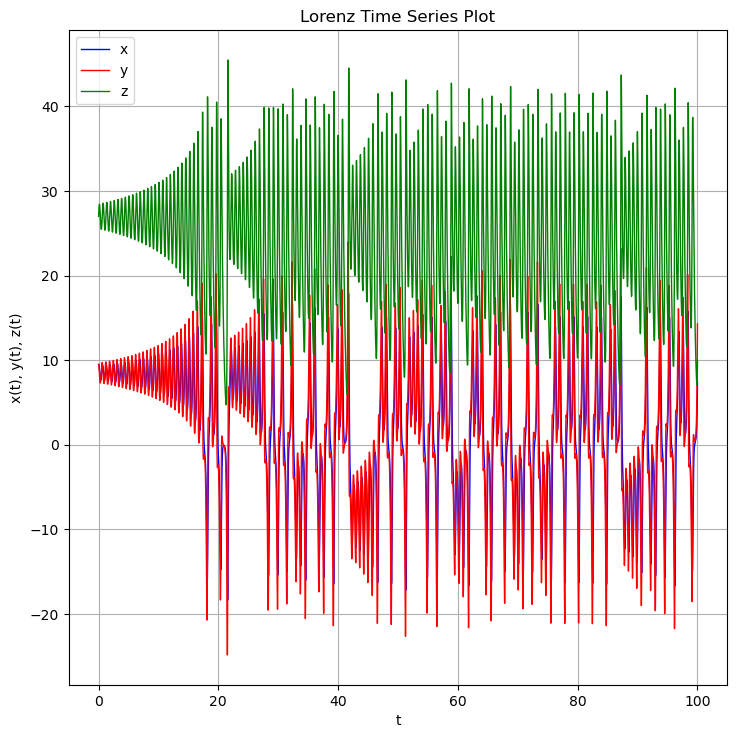

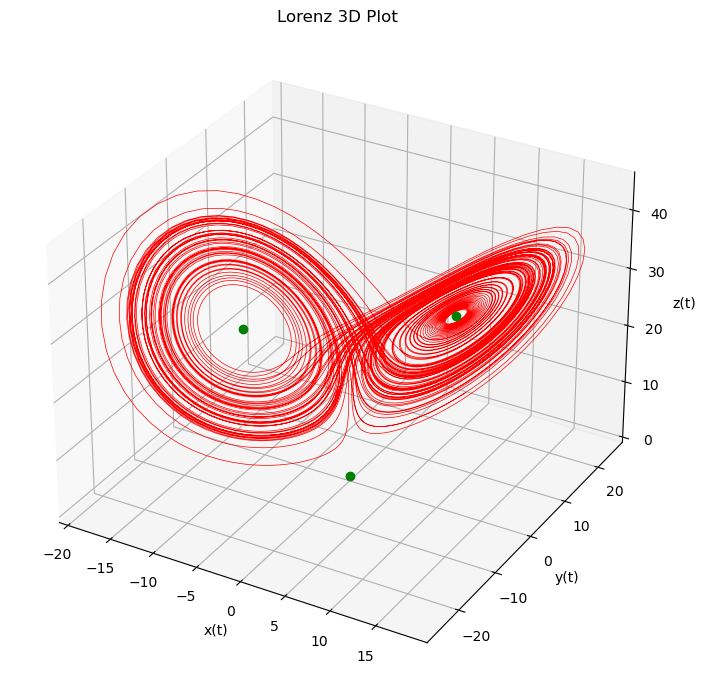

In [15]:
t = sol.t
ys = sol.y
lorenz_ode_plot_components(t, ys)
lorenz_ode_plot_3d(t, ys, fps)

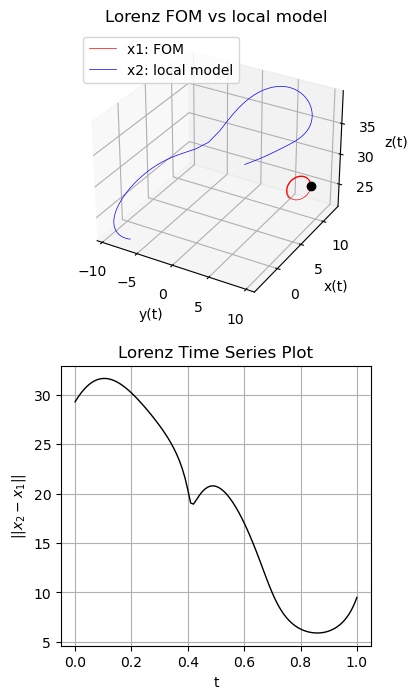

In [16]:
def compare_traces(t, ys1, ys2):
    x1, y1, z1 = ys1[0:3, :]
    x2, y2, z2 = ys2[0:3, :]
    diff = np.linalg.norm(ys2-ys1, axis=0)
    #f, (ax1, ax2) = plt.subplots(2, 1, figsize = (xsize, ysize))
    fig = plt.figure(figsize=plt.figaspect(2))
    ax1 = fig.add_subplot(2, 1, 1, projection='3d')
    ax1.plot(y1, x1, z1, linewidth = 0.5, color = 'r')
    ax1.plot(y2, x2, z2, linewidth = 0.5, color = 'b')
    ax1.plot(y1[0], x1[0], z1[0], 'ko')   
    ax1.grid(True)
    ax1.set_xlabel('y(t)')
    ax1.set_ylabel('x(t)')
    ax1.set_zlabel('z(t)')
    ax1.set_title('Lorenz FOM vs local model')
    ax1.legend(['x1: FOM','x2: local model'], loc = 2)
    
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(t, diff, linewidth = 1, color = 'k') 
    ax2.grid(True)
    ax2.set_xlabel('t')
    ax2.set_ylabel('$||x_2-x_1||$')
    ax2.set_title('Lorenz Time Series Plot')
    
    #plt.savefig('lorenz_ode_3d.png')
    plt.show()
    return

compare_traces(t_eval, ys[:, :npoints], ys_pred)